In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 03\DATASET\health insurance.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [3]:
## Checking for missing value
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
##Checking Outliers
#First, I separate of categorical or object and numerical data types (int64 & float64)
#This separation is done to check the outliers in the numeric column using the boxplot

numeric_col = []
categorical_col = []
for i in df.columns:
    #categorical columns
    if df[i].dtype == 'object':
        numeric_col.append(i)
    else:
        #numeric columns
        categorical_col.append(i)
        
print('Numerical Columns ({})'.format(len(numeric_col)))
print(numeric_col)
print('-'*100)
print('Categorical Columns ({})'.format(len(categorical_col)))
print(categorical_col)

Numerical Columns (3)
['Gender', 'Vehicle_Age', 'Vehicle_Damage']
----------------------------------------------------------------------------------------------------
Categorical Columns (9)
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']


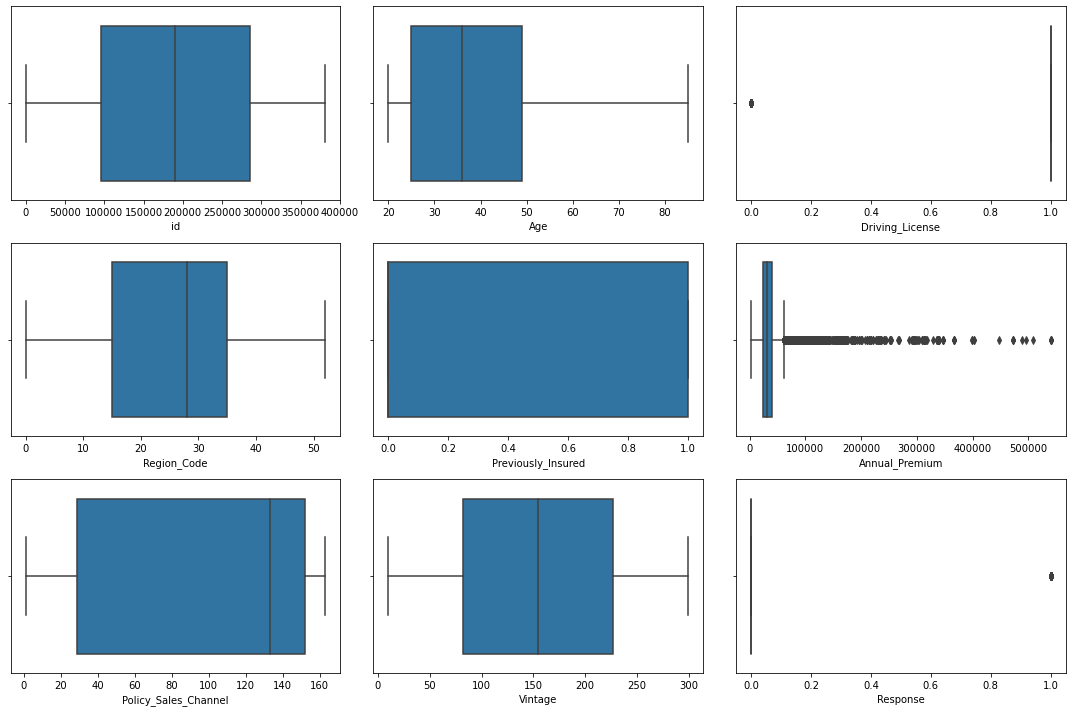

In [5]:
## Boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[col])
    plt.tight_layout()

In [6]:
df.describe(include='O').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [9]:
health_insuranceDESC = []

for i in df.columns:
    health_insuranceDESC.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    (((df[i].isna().sum())/len(df))*100).round(2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=health_insuranceDESC, columns=['feature_name', 'type', 'Null', 'Percentage Null', 'No Unique', 'Example Unique'])

,feature_name,type,Null,Percentage Null,No Unique,Example Unique
0,id,int64,0,0.0,381109,"[167176, 144472]"
1,Gender,object,0,0.0,2,"[Female, Male]"
2,Age,int64,0,0.0,66,"[65, 70]"
3,Driving_License,int64,0,0.0,2,"[0, 1]"
4,Region_Code,float64,0,0.0,53,"[39.0, 8.0]"
5,Previously_Insured,int64,0,0.0,2,"[1, 0]"
6,Vehicle_Age,object,0,0.0,3,"[< 1 Year, > 2 Years]"
7,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
8,Annual_Premium,float64,0,0.0,48838,"[80223.0, 64494.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[116.0, 115.0]"


### Data Preparation

In [10]:
## Checking for balance/ imbalance data of target
(((df['Response'].value_counts())/len(df))*100).round(2)

0    87.74
1    12.26
Name: Response, dtype: float64

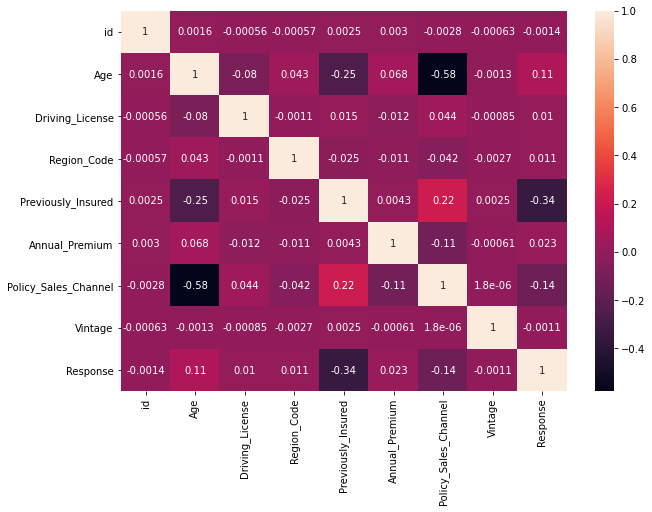

In [13]:
## Checking for correlation among features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
## Change types of some features
df['Region_Code'] = df['Region_Code'].astype(str)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(str)

In [18]:
# List of Categorical and Numerical Features after some change of type
char_col = []
num_col = []
for col in df.columns:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        num_col.append(col)
    else :
        char_col.append(col)
print('String columns ({}) : {}'.format(len(char_col), char_col))
print('-'*100)
print('Numerical columns ({}): {}'.format(len(num_col), num_col))

String columns (5) : ['Gender', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
----------------------------------------------------------------------------------------------------
Numerical columns (7): ['id', 'Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium', 'Vintage', 'Response']


In [19]:
## Feature Selection
df.drop(columns='id', inplace=True)

#Dropping 'id' because its just show Unique ID for the customer

In [69]:
# Scalling
df_scale = df.copy()
df_scale.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [55]:
x_scale=df_scale[['Age', 'Annual_Premium', 'Vintage']]
y_scale=df_scale['Response']

In [56]:
x_scale.columns

Index(['Age', 'Annual_Premium', 'Vintage'], dtype='object')

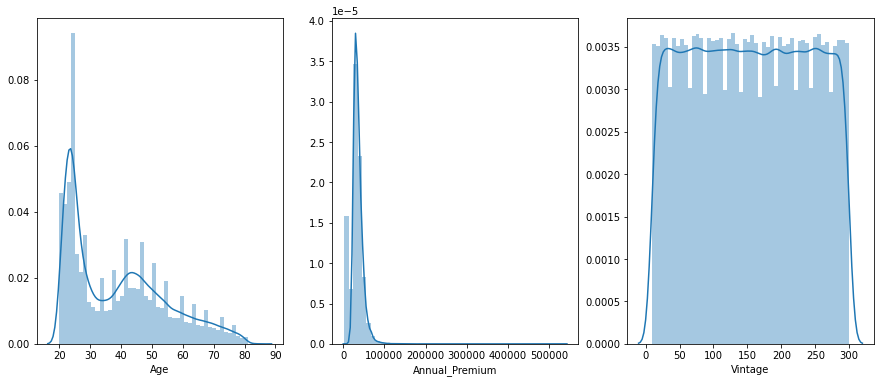

In [42]:
#Using distplot to know the distribution of features that will be scaled
plt.figure(figsize=(15,6))
for i, col in enumerate(x_scale.columns):
    plt.subplot(1,3,i+1)
    sns.distplot(df_scale[col])
plt.show()

#From the results seem that age and Annual_Premium has no normal distibution

In [21]:
## Robust Scaller

In [49]:
from sklearn.preprocessing import RobustScaler

In [50]:
scaling = RobustScaler()

In [57]:
df_scaled = pd.DataFrame(scaling.fit_transform(x_scale), columns=x_scale.columns)
df_scaled.head()

,Age,Annual_Premium,Vintage
0,0.333333,0.585862,0.434483
1,1.666667,0.124508,0.200000
2,0.458333,0.441814,-0.875862
3,-0.625000,-0.203401,0.337931
4,-0.291667,-0.278293,-0.793103


In [76]:
## Encoding
df_scale['Gender'] = df_scale['Gender'].apply( lambda x: 1 if x =='Male' else 0)
df_scale['Vehicle_Damage'] = df_scale['Vehicle_Damage'].apply( lambda x: 1 if x =='Yes' else 0)
df_scale['Vehicle_Age'] = df_scale['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2})

#One hot encoding
df_scale = pd.get_dummies(data =df_scale, columns=['Region_Code', 'Policy_Sales_Channel'], prefix_sep='_')

In [77]:
df_scale.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code_0.0,...,Policy_Sales_Channel_90.0,Policy_Sales_Channel_91.0,Policy_Sales_Channel_92.0,Policy_Sales_Channel_93.0,Policy_Sales_Channel_94.0,Policy_Sales_Channel_95.0,Policy_Sales_Channel_96.0,Policy_Sales_Channel_97.0,Policy_Sales_Channel_98.0,Policy_Sales_Channel_99.0
0,1,44,1,0,2,1,40454.0,217,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,76,1,0,1,0,33536.0,183,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,47,1,0,2,1,38294.0,27,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,21,1,1,0,0,28619.0,203,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,29,1,1,0,0,27496.0,39,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df_scale.drop(columns=['Age', 'Annual_Premium', 'Vintage'], inplace=True)

In [79]:
### Get All DataFrame
df_all = pd.concat([df_scaled, df_scale], axis=1)
df_all.head()

,Age,Annual_Premium,Vintage,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Region_Code_0.0,...,Policy_Sales_Channel_90.0,Policy_Sales_Channel_91.0,Policy_Sales_Channel_92.0,Policy_Sales_Channel_93.0,Policy_Sales_Channel_94.0,Policy_Sales_Channel_95.0,Policy_Sales_Channel_96.0,Policy_Sales_Channel_97.0,Policy_Sales_Channel_98.0,Policy_Sales_Channel_99.0
0,0.333333,0.585862,0.434483,1,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.666667,0.124508,0.200000,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.458333,0.441814,-0.875862,1,1,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.625000,-0.203401,0.337931,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.291667,-0.278293,-0.793103,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Machine Learning Building

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
from sklearn import set_config
set_config(print_changed_only=False)

In [82]:
x = df_all.drop(columns='Response')
y = df_all['Response']

In [84]:
#Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, train_size=.80, random_state=42)

### 1. Base Regresi Logistic

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
modelLog = LogisticRegression()

In [87]:
modelLog.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
y_pred_Log = modelLog.predict(x_test)

In [89]:
## Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [91]:
acc_LogReg = accuracy_score(y_test, y_pred_Log)
prec_log = precision_score(y_test, y_pred_Log)
rec_loc= recall_score(y_test, y_pred_Log)
f1_log=f1_score(y_test, y_pred_Log)

print(classification_report(y_test, y_pred_Log))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.35      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.62      0.50      0.47     76222
weighted avg       0.81      0.88      0.82     76222



In [93]:
cm_log = confusion_matrix(y_test, y_pred_Log, labels=[1,0])
df_cm_log = pd.DataFrame(data=cm_log, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_log

,Pred 1,Pred 0
Akt 1,22,9320
Akt 0,40,66840


### 2. Base KNN Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
modelKNN = KNeighborsClassifier()

In [96]:
modelKNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [97]:
y_KNN = modelKNN.predict(x_test)

In [98]:
acc_KNN = accuracy_score(y_test, y_KNN)
prec_KNN = precision_score(y_test, y_KNN)
rec_KNN= recall_score(y_test, y_KNN)
f1_KNN=f1_score(y_test, y_KNN)

print(classification_report(y_test, y_KNN))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     66880
           1       0.33      0.18      0.24      9342

    accuracy                           0.85     76222
   macro avg       0.61      0.57      0.58     76222
weighted avg       0.82      0.85      0.84     76222



In [99]:
cm_KNN = confusion_matrix(y_test, y_KNN, labels=[1,0])
df_cm_KNN = pd.DataFrame(data=cm_KNN, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_KNN

,Pred 1,Pred 0
Akt 1,1719,7623
Akt 0,3435,63445


### 3. Base Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
modelDT = DecisionTreeClassifier()

In [102]:
#fit model
modelDT.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
y_predDT = modelDT.predict(x_test)

In [104]:
acc_DT = accuracy_score(y_test, y_predDT)
prec_DT = precision_score(y_test, y_predDT)
rec_DT = recall_score(y_test, y_predDT)

print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66880
           1       0.30      0.31      0.31      9342

    accuracy                           0.83     76222
   macro avg       0.60      0.61      0.60     76222
weighted avg       0.83      0.83      0.83     76222



In [105]:
cm_DT = confusion_matrix(y_test, y_predDT, labels=[1,0])
df_DT = pd.DataFrame(data=cm_DT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_DT

,Pred 1,Pred 0
Akt 1,2931,6411
Akt 0,6768,60112


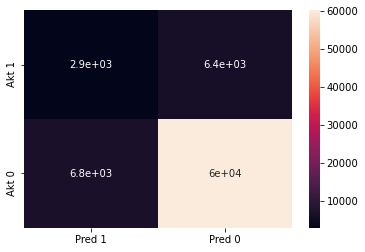

In [106]:
sns.heatmap(df_DT, annot=True)

### 4. Base Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
modelRF = RandomForestClassifier()

In [109]:
modelRF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
y_predRF = modelRF.predict(x_test)

In [111]:
acc_RF = accuracy_score(y_test, y_predRF)
print('accuracy : {}'.format(acc_RF))

prec_RF = precision_score(y_test, y_predRF)
print('Precision : {}'.format(prec_RF))

rec_RF = recall_score(y_test, y_predRF)
print('Recall : {}'.format(rec_RF))

print('-'*100)
print(classification_report(y_test, y_predRF))

accuracy : 0.8632022250793734
Precision : 0.35310046033035475
Recall : 0.1395846713765789
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     66880
           1       0.35      0.14      0.20      9342

    accuracy                           0.86     76222
   macro avg       0.62      0.55      0.56     76222
weighted avg       0.82      0.86      0.84     76222



In [112]:
cm_RF = confusion_matrix(y_test, y_predRF, labels=[1,0])
df_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_RF

,Pred 1,Pred 0
Akt 1,1304,8038
Akt 0,2389,64491


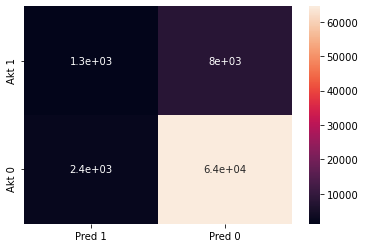

In [113]:
sns.heatmap(df_RF, annot=True)

### Optimize Model 
1. Handling Imbalance Data
2. Hyper Parameter Tuning

### `1. Random Over Sampling`

In [114]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.shape

(304887, 217)

In [115]:
df_train['Response'].value_counts()

0    267519
1     37368
Name: Response, dtype: int64

In [116]:
yes_insurance = df_train[df_train['Response'] == 1] #Class Minority
no_insurance = df_train[df_train['Response'] == 0 ] #Class Majority

In [117]:
from sklearn.utils import resample

In [118]:
yes_insurance_oversample = resample(yes_insurance,
                                   replace=True,
                                   n_samples = len(no_insurance),
                                   random_state =42)

In [119]:
df_OverSample = pd.concat([no_insurance, yes_insurance_oversample])

In [120]:
df_OverSample['Response'].value_counts()

1    267519
0    267519
Name: Response, dtype: int64

In [121]:
x_train_oversample = df_OverSample.drop(columns='Response')
y_train_oversample = df_OverSample['Response']

#### a. Logistic Regression

In [122]:
modelLog_OS = LogisticRegression()

In [123]:
modelLog_OS.fit(x_train_oversample, y_train_oversample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
y_predLog_OS = modelLog_OS.predict(x_test)

In [125]:
acc_LogReg_OS = accuracy_score(y_test, y_predLog_OS)
prec_log_OS = precision_score(y_test, y_predLog_OS)
rec_loc_OS = recall_score(y_test, y_predLog_OS)
f1_log_OS =f1_score(y_test, y_predLog_OS)

print(classification_report(y_test, y_predLog_OS))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66880
           1       0.28      0.94      0.43      9342

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.70      0.75     76222



In [126]:
cm_log_OS = confusion_matrix(y_test, y_predLog_OS, labels=[1,0])
df_cm_log_OS = pd.DataFrame(data=cm_log_OS, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_log_OS

,Pred 1,Pred 0
Akt 1,8750,592
Akt 0,22613,44267


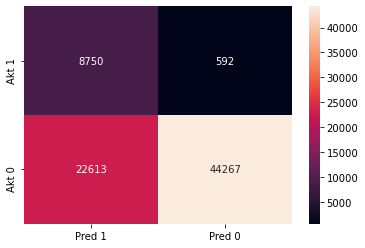

In [129]:
sns.heatmap(df_cm_log_OS, annot=True, fmt='g')

#### b. KNN Classifier

In [130]:
modelKNN_OS = KNeighborsClassifier()

In [131]:
modelKNN_OS.fit(x_train_oversample, y_train_oversample)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [132]:
y_predKNN_OS = modelKNN_OS.predict(x_test)

In [133]:
acc_KNN_OS = accuracy_score(y_test, y_predKNN_OS)
prec_KNN_OS = precision_score(y_test, y_predKNN_OS)
rec_KNN_OS = recall_score(y_test, y_predKNN_OS)
f1_KNN_OS =f1_score(y_test, y_predKNN_OS)

print(classification_report(y_test, y_predKNN_OS))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     66880
           1       0.28      0.63      0.39      9342

    accuracy                           0.76     76222
   macro avg       0.61      0.70      0.62     76222
weighted avg       0.86      0.76      0.79     76222



In [134]:
cm_KNN_OS = confusion_matrix(y_test, y_predKNN_OS, labels=[1,0])
df_cm_KNN_OS = pd.DataFrame(data=cm_KNN_OS, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_KNN_OS

,Pred 1,Pred 0
Akt 1,5854,3488
Akt 0,14975,51905


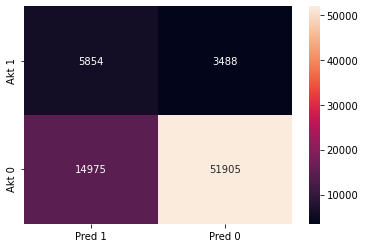

In [135]:
sns.heatmap(df_cm_KNN_OS, annot=True, fmt='g')

#### c. Decision Tree Classifier

In [136]:
modelDT_OS = DecisionTreeClassifier()

In [137]:
modelDT_OS.fit(x_train_oversample, y_train_oversample)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [138]:
y_predDT_OS = modelDT_OS.predict(x_test)

In [139]:
acc_DT_OS = accuracy_score(y_test, y_predDT_OS)
prec_DT_OS = precision_score(y_test, y_predDT_OS)
rec_DT_OS = recall_score(y_test, y_predDT_OS)
f1_DT_OS =f1_score(y_test, y_predDT_OS)

print(classification_report(y_test, y_predDT_OS))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     66880
           1       0.29      0.30      0.30      9342

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222



In [141]:
cm_DT_OS = confusion_matrix(y_test, y_predDT_OS, labels=[1,0])
df_cm_DT_OS = pd.DataFrame(data=cm_DT_OS, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_DT_OS

,Pred 1,Pred 0
Akt 1,2809,6533
Akt 0,6830,60050


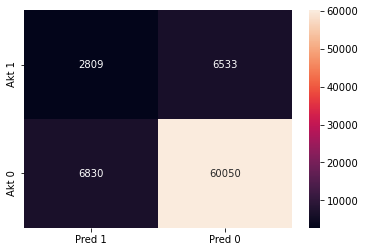

In [142]:
sns.heatmap(df_cm_DT_OS, annot=True, fmt='g')

#### d. Random Forest Classifier

In [143]:
modelRF_OS = RandomForestClassifier()

In [144]:
modelRF_OS.fit(x_train_oversample, y_train_oversample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
y_predRF_OS = modelRF_OS.predict(x_test)

In [146]:
acc_RF_OS = accuracy_score(y_test, y_predRF_OS)
prec_RF_OS = precision_score(y_test, y_predRF_OS)
rec_RF_OS = recall_score(y_test, y_predRF_OS)
f1_RF_OS =f1_score(y_test, y_predRF_OS)

print(classification_report(y_test, y_predRF_OS))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     66880
           1       0.34      0.29      0.31      9342

    accuracy                           0.84     76222
   macro avg       0.62      0.60      0.61     76222
weighted avg       0.83      0.84      0.84     76222



In [147]:
cm_RF_OS = confusion_matrix(y_test, y_predRF_OS, labels=[1,0])
df_cm_RF_OS = pd.DataFrame(data=cm_RF_OS, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_RF_OS

,Pred 1,Pred 0
Akt 1,2688,6654
Akt 0,5315,61565


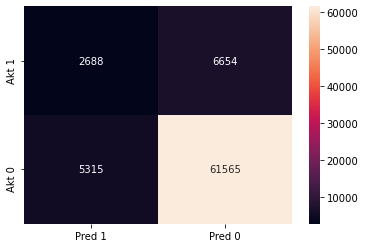

In [148]:
sns.heatmap(df_cm_RF_OS, annot=True, fmt='g')